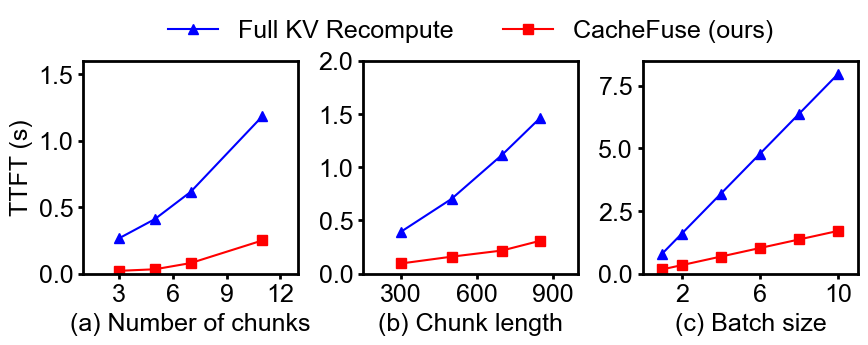

In [38]:
import matplotlib.pyplot as plt
import numpy as np
fontsize = 18
plt.rcParams['font.size']  = fontsize
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 2

msize = 7
#-----------------chunk number-------------------
#x = [3,5,7,9,11]
#
#
#y_full = [177*1500/1000,328*2500/2000,527*3500/3000,798*4500/4000,1291*5500/6000]
#div = [0.05,0.05,0.08,0.15,0.13]
#y_ours = [y_full[i]/4.1*div[i]/0.15 for i in range(len(y_full))]
x = [3,5,7,11]
y_full = [177*1500/1000,328*2500/2000,527*3500/3000,1291*5500/6000]
div = [0.05,0.05,0.08,0.13]
y_ours = [y_full[i]/4.1*div[i]/0.15 for i in range(len(y_full))]


fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(131)
plt.plot(x, [i /1000 for i in y_full],'^', markersize =msize, linestyle="-", color="blue", label="Full prefill")
plt.plot(x, [i / 1000 for i in y_ours],'s', markersize =msize, linestyle="-", color="red", label="METIS prefill")

plt.xticks((3, 6, 9, 12),fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.ylabel("TTFT (s)",fontsize=fontsize)
plt.xlabel("(a) Number of chunks",fontsize=fontsize)
plt.ylim((0,1.6))
plt.xlim((1,13))
plt.tick_params(axis='both', which='major', width=2)

#-----------------chunk length-------------------
x = [300,500,700,850,1000][:-1]

y_full = [328*2400/2000,527*4000/3000,798*5600/4000,1291*6800/6000,1859][:-1]
div = [0.15,0.14,0.12,0.13,0.15][:-1]
y_ours = [y_full[i]/4.1*div[i]/0.15 for i in range(len(y_full))]


ax = fig.add_subplot(132)
plt.plot(x, [i /1000 for i in y_full],'^', markersize =msize,linestyle="-", color="blue", label="Full prefill")
plt.plot(x, [i / 1000 for i in y_ours],'s', markersize =msize,linestyle="-", color="red", label="Ours prefill")

plt.xticks((300,600,900),fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel("(b) Chunk length",fontsize=fontsize)
plt.ylim((0,2))
plt.xlim((150,1000))
plt.tick_params(axis='both', which='major', width=2)

#--------------batchsize----------------------------

x = [1,2,4,6,8,10]

y_full = [798*(i+0.01) for i in x]
y_ours = [171*(i+0.01) for i in x]

y_decode = np.array([26.15,27.54,27.64,27.74,27.82,27.99])*10
ax = fig.add_subplot(133)
plt.plot(x, [i / 1000 for i in y_ours],'s', markersize =msize,linestyle="-", color="red", label="CacheFuse (ours)")
plt.plot(x, [i /1000 for i in y_full],'^', markersize =msize,linestyle="-", color="blue", label="Full KV recompute")
# plt.plot(x, y_decode, 'o',linestyle="--",color="cornflowerblue", label="Decode 10 toks")

plt.xticks((2,6,10),fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel("(c) Batch size",fontsize=fontsize)
plt.ylim((0,8.5))
plt.xlim((0,11))
plt.tick_params(axis='both', which='major', width=2)

#------------------------------------------
plt.subplots_adjust(wspace = 0.3, hspace =0.32,bottom=0.17)
plt.legend(loc="upper center",frameon=False,bbox_to_anchor=[-0.8,1.3],fontsize=fontsize,ncol=3)
plt.savefig("time_vs_len_bsz_v2.pdf", format = 'pdf', bbox_inches = 'tight')